## Multiple Linear Regression

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [70]:
df.describe()

# std meanden büyükse outlier sorunu olabilir,

# 25 ile min veya 75 ile max. arasında ciddi bir fark varsa outlier üzerinde durulmalı.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
def check_dist(df, var):
    plt.subplot(1,2,1)
    sns.histplot(x=var, data=df, kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

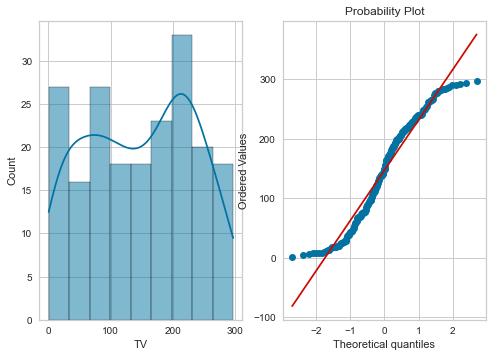

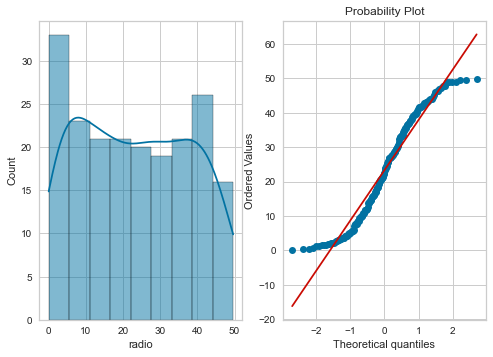

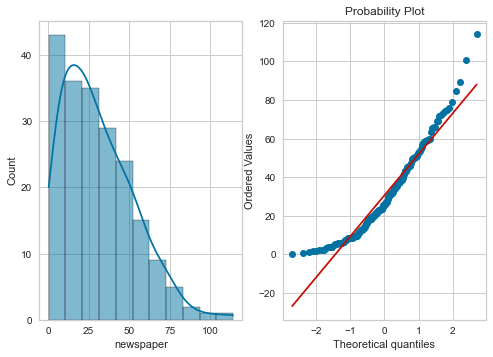

In [69]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)
    
# değerlerim line etrafında bir sarmaşık gibi dolanmışsa burda normal dağılım var diyebiliriz.
# ama bir tarafta sapma (line'dan uzaklaşma) varsa normal dağılımdan uzaklaşmış demektir.

In [8]:
from scipy.stats import skew
for i in df.drop(columns="sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


In [71]:
# lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.

# "skew değeri -1, +1 'den büyükse linear regresyon uygulayamayız diye kesin bir hüküm veremeyiz. Sadece linear regresyon uyguladığımızda sonuçlarımız çok iyi çıkmayabilir şeklinde yorumlayabiliriz. datayı linear modele sokup skorları görmeden net birey konuşmayız. skew bize sadece bir öngörü sağlar" **Johnson hoca düzeltme**

# eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz ve dolayısıyla lineer regression için uygundur. 

# 0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız. 

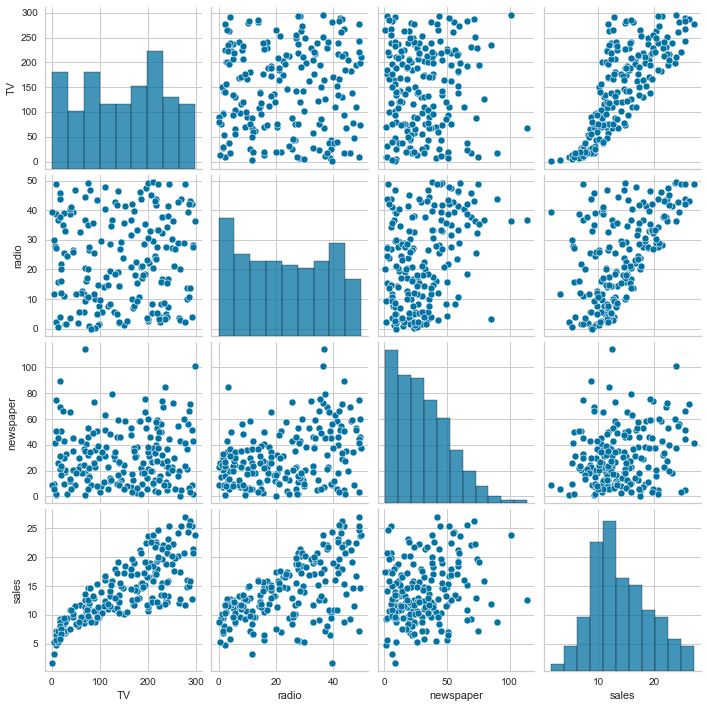

In [72]:
sns.pairplot(df)

# TV-sales : pozitif güçlü

# RADIO-sales: ORTA

# NEWSPAPER - sales: zayıf

In [74]:
df.corr()

#Tüm dependent feature'ların independent feature (target/label) ile olan bağlılıklarına bakıyoruz. 
# Aralarındaki ilişkinin gücü bana hangi feature'ların tahmin etmede daha önemli olduğu konusunda bir fikir verse de sadece corr ile buna karar veremeyiz. 
# Corr ile bir lineerity var mı ona bakarız
# correlasyon bana bir linearity den bahsedebilir miyiz bahsedemez miyiz bana bunu söylüyor.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

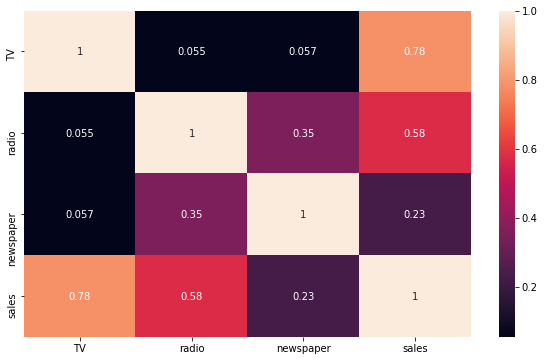

In [11]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [12]:
X = df.drop(columns ="sales")  # df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [13]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# test_size = 0.3 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# random_state=42 ile 42'yi kullandığım her defasında aynı train ve test datasını alacak. 
# mesela aynı datada çalışırken takım arkadaşlarınızla skorlarınızı karşılaştırabilmeniz için bunu aynı rakam girmelisin. 
# ki anlamlı bir karşılaştırma yapabilesiniz.

In [15]:
df.sample(15)

,TV,radio,newspaper,sales
27,240.1,16.7,22.9,15.9
71,109.8,14.3,31.7,12.4
194,149.7,35.6,6.0,17.3
75,16.9,43.7,89.4,8.7
43,206.9,8.4,26.4,12.9
72,26.8,33.0,19.3,8.8
170,50.0,11.6,18.4,8.4
68,237.4,27.5,11.0,18.9
151,121.0,8.4,48.7,11.6
50,199.8,3.1,34.6,11.4


In [16]:
print("Train features shape :", X_train.shape)
print("Train features shape :", y_train.shape)
print("Train features shape :", X_test.shape)
print("Train features shape :", y_test.shape)

Train features shape : (140, 3)
Train features shape : (140,)
Train features shape : (60, 3)
Train features shape : (60,)


In [17]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [18]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [19]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [20]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)  # modeli eğittik. artık değerlendirme aşamasına geçiyoruz

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [25]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [26]:
comparing = pd.DataFrame(my_dict)  # bu değerler modelin genelini temsil ediyor. 
                                   # tek bir satıra veya feature a bakarak değerlendirme yapılmaz.
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [27]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


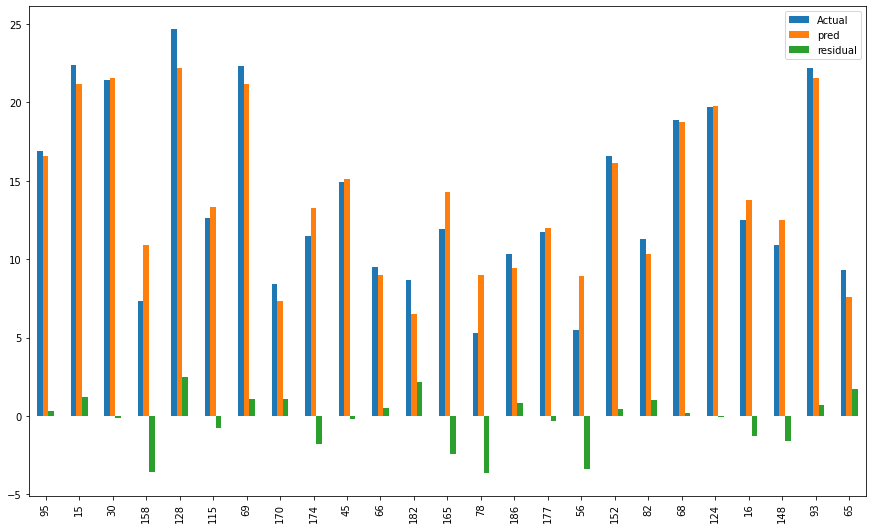

In [28]:
result_sample.plot(kind="bar", figsize=(15,9))  # artık görselleştiriyoruz
plt.show()

## Error Metrics

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
R2_score = r2_score(y_test, y_pred) 
R2_score

0.8609466508230368

In [80]:
# elimdeki veriler doğru tahmin yapmak için 86% oranında yeterli.

# dependent değerdeki değişikliğin % 86 sı bağımsız değişkenler ile açıklanabiliyor. 
# 86% of variance in DEPENDENT VARIABLE is explained by INDEPENDENT VARIABLE(S)

# geriye kalan %14 ü ise belirlenemeyen nedenlerden kaynaklı.
# adamın banyosunda altın küvet vardır evin fiyatı olması gerektiğinden fahiştir.

In [81]:
#MAE : absolut alarak artı ve eksi değerlerin birbirini götürmesi önlenerek hataların büyüklükleri toplanarak ortalama alınır.

#MSE: hataların varyasyonu da denebilir. küçük hataları büyütür. bunu inteprett edilmesi, yorumlanması zordur. 

#bunu aşmak için RMSE kullanılır.
#burada da hataların karesi alındıktan sonra tekrar root squared alınarak yine aynı seviyeye (datayla aynı metriğe) çekilir.

In [82]:
# TİP = Residual'ları biz modelimizin lineer regreesyona uygun oymadığını bulmak için kullanıyoruz.

In [31]:
mae = mean_absolute_error(y_test, y_pred)  # residuallerin mutlak değerini alıp hepsini topluyoruz ve gözlem sayısına gölüyoruz.
mae

1.5116692224549089

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152205

In [33]:
rmse = np.sqrt(mse)
rmse

1.9485372043446387

In [34]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [83]:
mae / sales_mean  # sales ortalamam 14 idi, mae ortalamam 1.5 idi. 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.
                  # mae nin ortalamaya göre oranı %10
                  # yani tahminlerim mae ye göre ortalama %10 hatalı

0.10780311802138767

In [36]:
rmse / sales_mean # tahminlerim rmse ye göre % 14 oranında hatalı
                  # yüksek çıktığı için cezlandırcağız. yukarıdaki değerlerimi değiştireceğim
    
                  # ilerleyen zamanlarda farklı regression lar göreceğiz. 
                  # onlar arasında rmse en düşük olanı dikkate alacağız
                  # daha sonra onları nasıl daha iyileştireceğime karar vereceğim.
                  # iyileştirme yöntemlerim --> gözlemimi artırırım, feature larımı artırırım.

0.13895790367941796

In [84]:
#Neden RMSE'yi tercih ediyoruz? 
#Biz tahminlerle gerçek değerler arasındaki farkları (Resudial'larımı)
#RMSE  büyük oranda cezalandırıyor ve görünür hale getiriyor. (küçük olan farkları bile büyütüp gözümüze sokuyor) büyük farklar çıkınca demiş oluyor ki senin tahminlerinde hatalar var. 
#Biz farklı modelleri deneyeceğiz, hangisinde RMSE düşükse onu esas alacağız!

In [37]:
# rmse ile bulduğumuz değere bakıyoruz.
# gerçek değer ile tahmin edilen değer arasında ciddi bir uçurum varsa onu cezalandırıyoruz.
# böylece rmse yi minimize ediyoruz
# aşağıda bunun örneğini göreceğiz

## What is the concept of punishment for RMSE error metric?

In [38]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3600]}  # 3200 --> 3600 (cezalandırdık)

In [39]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [40]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [41]:
# mae
df_2.residual.sum()/3  # cezalandırmadan önce bulduğum değerim 166.66

300.0

In [42]:
# rmse
((df_2.residual**2).sum()/3)**0.5  #cezalandırmadan önce bulduğum değerim 173.20

369.68455021364724

In [85]:
# pred'in bir değerini 3600 yaptığımda rmse 173'den 369 a çıktı! 

# mae'deki yeni durum 300 iken rmse de (rmse, karekökten dolayı mae ile aynı seviyede bir metrik olmasına rağmen) bu değerin 369 olduğunu gördüm.
# yani RMSE mae'ye göre hatayı daha görünür hale getirdi. CEZALANDIRDI

## Evaluation Model

In [43]:
# yukarıdaki mae-mse-rmse değerlerimi her defasında tek tek yazarak uğraşmamak için kolay bir def yazdık.

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [44]:
eval_metric(y_test, y_pred) # değerlerimizi kolayca def ile tek seferde elde ettik
                            # bu değerleri elde ettik ama neye göre değerlendireceğiz : 
                            # az önce train yaptığımız değerleri kullanıp tekrar prediction yapacağız.
                            # ve bu bu kod satırının cevaplarıyla karşılaştıracağız.
                            # beklentimiz kıyasladığımız değerlerin birbirine olabildiğince yakın olması

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.7967972367152205
RMSE 		: 1.9485372043446387


In [45]:
y_train_pred = model.predict(X_train)  # tekrar train ettik.

In [46]:
eval_metric(y_train, y_train_pred)  # bu sonucu üstteki train edilmemiş sonuçla karşılaştır
                                    # y_train in sonuçlarının daha iyi çıkması beklendiği için y_train i kullandık.
                                    # çünkü zaten eğitimi yaptı ve verileri daha önceden gördü
                                    # bu durum çoğunlukla böyledir ama herzaman olmayabilir

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.479355178905786
RMSE 		: 1.574596830590544


In [86]:
# y_train skorlarının çoğunlukla daha iyi çıkması beklenir. çünkü train yaparken bu datayı kullandığı için bu veriler üzerinde eğitim yaptığı için bu verileri gördüğü için.. (fakat her zaman değil)

# fakat ben görmediğim veriler üzerinde de modelimden iyi skorlar alabiliyorum.

# burada modelimin test datası ile yaptığımda elde ettiğim skor, train data ile yaptığıma ayakın olduğu için optimal bir başarıyı yakaladık diyebiliriz. 

# Yani test setinden aldığım değerle train setinden aldığımız değeri kıyaslıyoruz. 

# Bu değerler ne kadar yakınsa modelimin başarı oranı o kadar iyidir.

## Is data suitable for linear regression?

## Plotting residuals

In [47]:
# şimdi yapacağım işlemleri modelimin lineer regresyona uygun olup olmadığını görmek için yapıyorum

In [48]:
residuals = y_test - y_pred

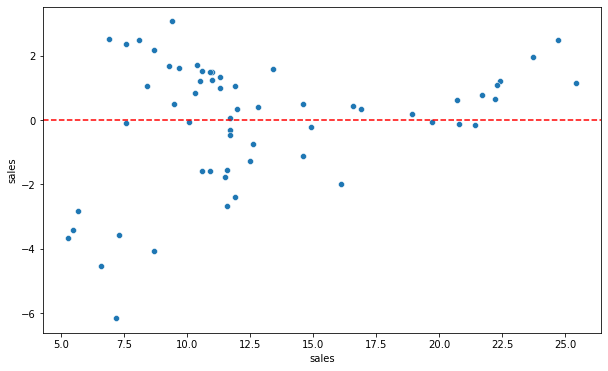

In [49]:
plt.figure(figsize= (10,6))
sns.scatterplot(x= y_test, y= residuals) # residuals
plt.axhline(y = 0, color="r", linestyle="--") # kırmızı çizgiyi grafiğe ekledik.
plt.show()

# düz kesikli çizgi gerçek değerle tahmin değerin sıfır olduğu noktayı ifade eder.
# mavi noktalar da aradakı farklar.

In [50]:
# Benim residual değerlerim kırmızı çizginin her iki tarafında ne kadar normal dağılmışsa, çizginin altındaki değerlerler ile üstündeki değerler birbirini götürecek şekilde ise (toplamı 0 veya 0'a yakın ise)  
# yani linearity ne kadar fazla ise veri linear modele o kadar uygundur


# genel olarak bilmemiz gereken residual grafiğinde;

# 1. herhangi bir patern OLMAMALI
# 2. 0'ın üstüde ve altında eşit bir dağılım olmalı  --> böyle ise linear regression'a uygun bir datanız var demektir.

<AxesSubplot:xlabel='sales', ylabel='Density'>

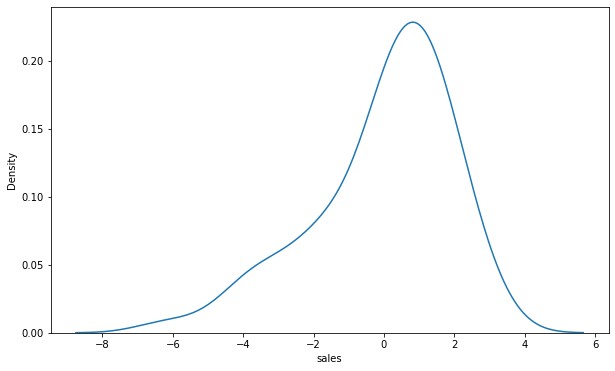

In [51]:
sns.kdeplot(residuals)  # burda da dağılıma bakıyoruz (left skewed bir grafik olduğunu görüyoruz)

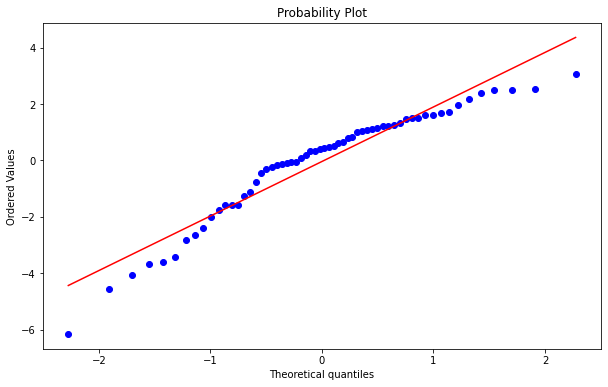

In [52]:
stats.probplot(residuals, dist="norm", plot=plt); # dist = norm --> normal dağılım

# verilerim kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

In [53]:
skew(residuals) # model tam sınırda. nonlineer bir modele sokarsam daha iyi bir sonuç alabilirim.

-0.9865673346742742

In [87]:
#lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.

# eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz ve dolayısıyla lineer regression için uygundur. 

# 0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz.

# bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız. 

In [54]:
pip install yellowbrick

In [55]:
from yellowbrick.regressor import ResidualsPlot
# buradaki kütüphane ile yukarıda yaptığımız residual plotu daha iyi görselleştireceğiz.

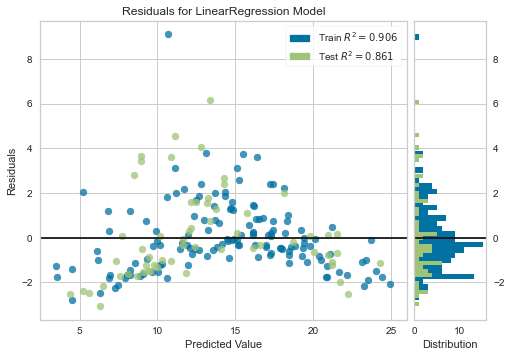

In [56]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

In [88]:
# hangi modelin linear Reg için daha uygun olup olmadığını anlamak için bu grafikleri tek tek çizdirmeye gerek yok. 

# diğer modeller ile kıyaslayıp karar vermemiz gerek ama interview larda sorarlarsa corr ve normal dağılıma benzerliği ile karar vermemiz gerektiğini aklımızda bulunduralım.

## Prediction Error for LinearRegression

In [57]:
from yellowbrick.regressor import PredictionError

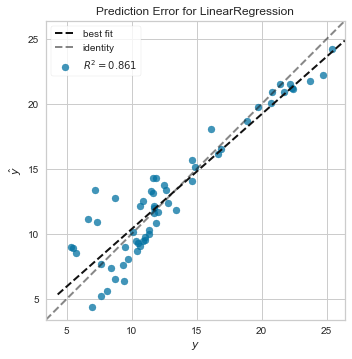

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [58]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [89]:
# Silik olan line, değerlerin mükemmel olduğu sonuç. siyah olan ise lineer regressyonunuzdan sonucunda çıkan sonuç.
# bunlar üst üste bindiği zaman modelinizden rahatlıkla emin olabilirsiniz.

## Retraining Model on Full Data

In [59]:
final_model = LinearRegression()

In [60]:
final_model.fit(X, y)  # train leri kullanmadık.
                       # çünkü en iyi modeli karar verdikten sonraki eğitimi tüm datasetimle yapıyorum 

LinearRegression()

In [90]:
# eğitimimi tamamladıktan ve model validation'u geçtikten ;
# (yani modelimden emin olduktan ve hangi modeli seçeceğime karar verdikten sonra) artık son aşamada tüm datamı kullanarak fit yapıyorum.

# çünkü modelimi ne kadar büyük data ile eğitirsem  o kadar iyi sonuç alırım 
# ( o kadar daha kesin ve sağlıklı bir predict veren modelim olur)

In [91]:
# Hangi modeli seçmem gerektiğine karar verdikten sonra, modeli tüm data ile eğitirim.
# Çünkü ne kadar fazla data ile eğitirsem o kadar daha kesin ve sağlıklı bir predict yapan algoritma oluştururum.

# validation'u bir önceki adımda test datam ile geçti. modelimden emin oldum ve ona karar verdim.
# o yüzden artık emin olduğum modelimi daha büyük data ile eğitiyorum.

## Coefficients

In [61]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [62]:
final_model.intercept_

2.9388893694594067

In [63]:
coef_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_df
# buradaki değerlere bakarak şu daha etkilidir diyemeyiz.
# burdaki değerleri feature'larla çarpınca hangisi daha etkili olduğunu belirleriz.

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [64]:
adv = [[150,20,15]]  #2 boyutlu olmalı. yoksa hata verir

In [65]:
final_model.predict(adv)

array([13.55862413])

In [66]:
0.045765 * 150 + 0.188530 *20 + -0.001037*15 + final_model.intercept_

13.558684369459405

In [67]:
adv_2 = [[150, 20, 15], [160, 20, 15]], #TV tahminimi 10 birim artırdım

In [92]:
final_model.predict(adv_2) # TV tahminimi 10 birim artırınca 0,45 fark oluştu

ValueError: Found array with dim 3. Estimator expected <= 2.

## Feature importance (The effect of features on the predicted label)

In [93]:
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [94]:
np.array(adv).reshape(3, 1)

array([[150],
       [ 20],
       [ 15]])

In [95]:
coef_df * np.array(adv).reshape(3, 1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [96]:
6.864697 / 13.55862413  # TV reklamının satışa etkisi etkisi %50

0.5062974630892729

In [97]:
3.770600 / 13.55862413 # radio reklamının satışa etkisi %27

0.2780960637191142

In [98]:
-0.015562 / 13.55862413  # gazete reklamının satışa etkisi %0.1

-0.0011477565755043907

In [99]:
final_model.intercept_ / 13.55862413  # intercept imin satışa etkisi %21

0.2167542474281575